In [1]:
import os
import sys

In [2]:
current_dir=os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,current_dir)

c:\Users\Yayerad\Desktop\AIM\Nova-Financial-Solutions\notebooks
c:\Users\Yayerad\Desktop\AIM\Nova-Financial-Solutions


In [5]:
import pandas as pd

import os

# Define the relative path to the data directory
data_dir = '../data/yfinance_data'

# List of filenames in the data directory
filenames = [
    'AAPL_historical_data.csv',
    'AMZN_historical_data.csv',
    'GOOG_historical_data.csv',
    'META_historical_data.csv',
    'MSFT_historical_data.csv',
    'NVDA_historical_data.csv',
    'TSLA_historical_data.csv'
]

# Dictionary to hold DataFrames for each stock
stock_data = {}

for filename in filenames:
    # Construct the full path to the CSV file
    file_path = os.path.join(data_dir, filename)
    
    # Extract the stock symbol from the filename
    stock_symbol = filename.split('_')[0]
    
    # Load the data
    df = pd.read_csv(file_path, parse_dates=['Date'])
    
    # Fill or drop missing values if necessary
    df.fillna(method='ffill', inplace=True)
    
    # Ensure the DataFrame includes only the essential columns
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Store the DataFrame in the dictionary
    stock_data[stock_symbol] = df

# Display the first few rows of one of the DataFrames to ensure data is loaded correctly
print(stock_data['AAPL'].head())

C:\Users\Yayerad\AppData\Local\Temp\ipykernel_14788\1820487499.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


                Open      High       Low     Close     Volume
Date                                                         
1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600


C:\Users\Yayerad\AppData\Local\Temp\ipykernel_14788\1820487499.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Yayerad\AppData\Local\Temp\ipykernel_14788\1820487499.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Yayerad\AppData\Local\Temp\ipykernel_14788\1820487499.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Yayerad\AppData\Local\Temp\ipykernel_14788\1820487499.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users

In [6]:
import ta

for stock_symbol, df in stock_data.items():
    # Add Simple Moving Average (SMA)
    df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
    
    # Add Exponential Moving Average (EMA)
    df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
    
    # Add Relative Strength Index (RSI)
    df['RSI_14'] = ta.momentum.rsi(df['Close'], window=14)
    
    # Add MACD
    df['MACD'] = ta.trend.macd(df['Close'])
    df['MACD_signal'] = ta.trend.macd_signal(df['Close'])
    df['MACD_hist'] = ta.trend.macd_diff(df['Close'])

    # Update the dictionary with the new DataFrame
    stock_data[stock_symbol] = df

# Display the indicators for one stock to ensure everything is calculated correctly
print(stock_data['AAPL'][['SMA_20', 'EMA_20', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist']].head())


            SMA_20  EMA_20  RSI_14  MACD  MACD_signal  MACD_hist
Date                                                            
1980-12-12     NaN     NaN     NaN   NaN          NaN        NaN
1980-12-15     NaN     NaN     NaN   NaN          NaN        NaN
1980-12-16     NaN     NaN     NaN   NaN          NaN        NaN
1980-12-17     NaN     NaN     NaN   NaN          NaN        NaN
1980-12-18     NaN     NaN     NaN   NaN          NaN        NaN


In [7]:
for stock_symbol, df in stock_data.items():
    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Calculate cumulative returns
    df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
    
    # Update the dictionary with the new DataFrame
    stock_data[stock_symbol] = df

# Display the financial metrics for one stock to ensure calculations are correct
print(stock_data['AAPL'][['Daily_Return', 'Cumulative_Return']].head())


            Daily_Return  Cumulative_Return
Date                                       
1980-12-12           NaN                NaN
1980-12-15     -0.052171           0.947829
1980-12-16     -0.073398           0.878261
1980-12-17      0.024751           0.899998
1980-12-18      0.028992           0.926092


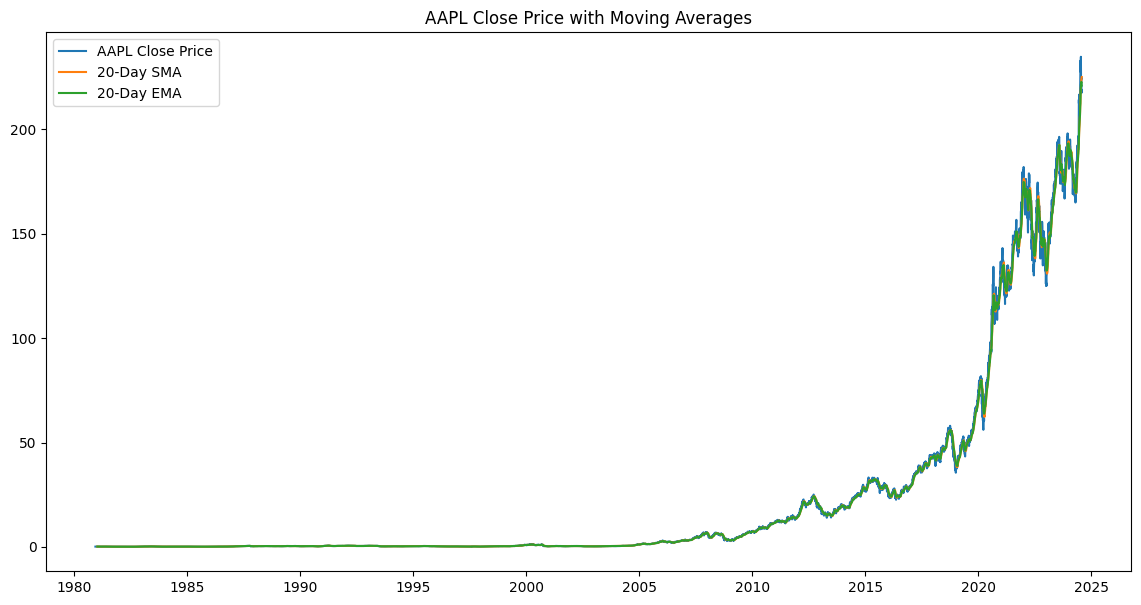

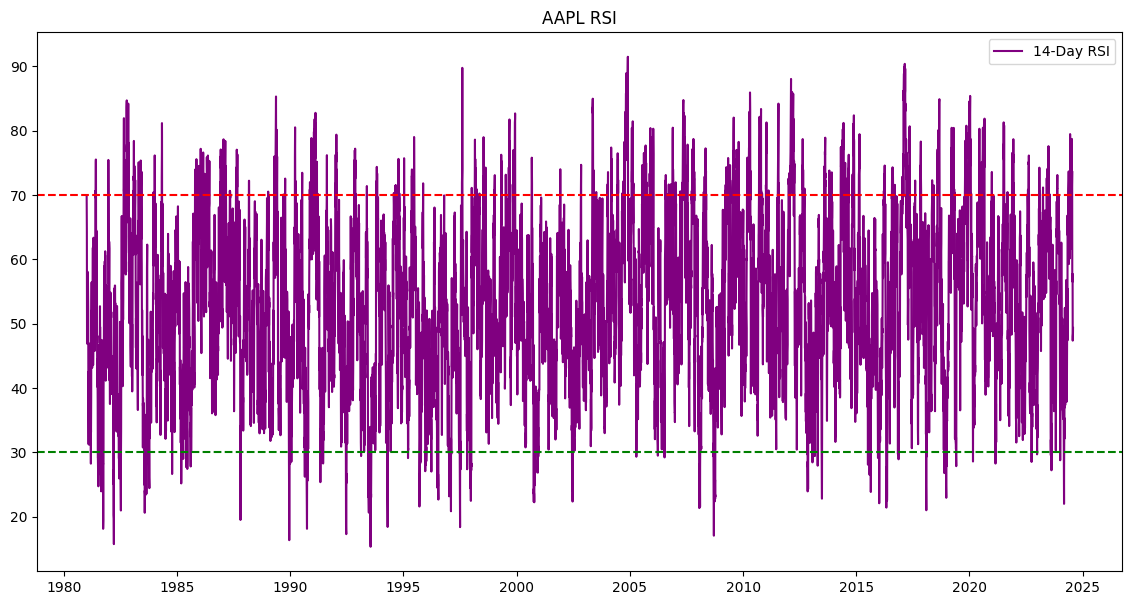

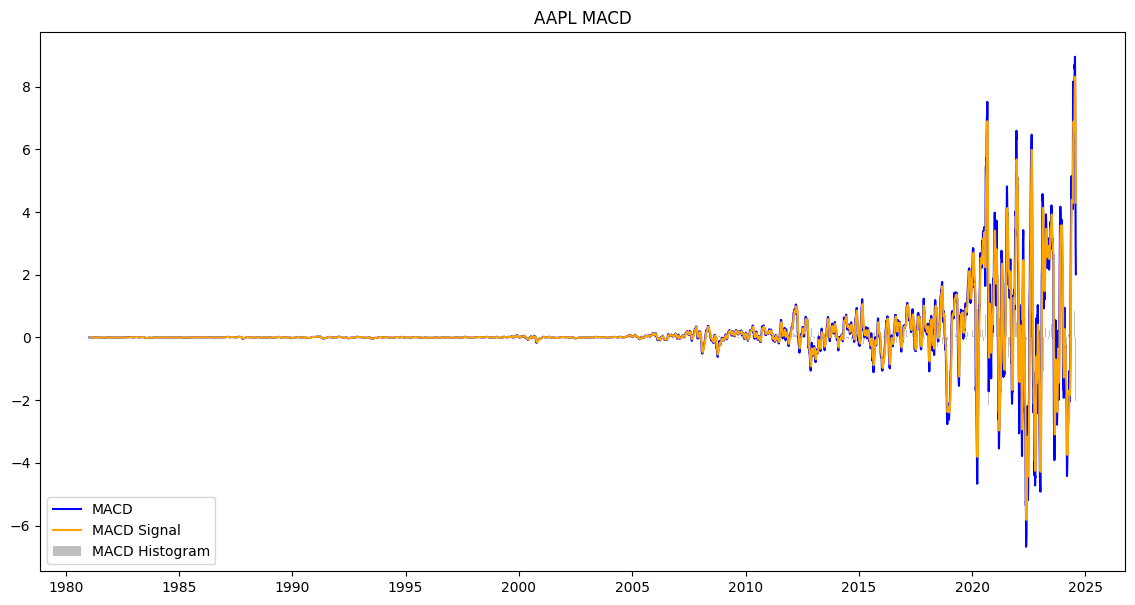

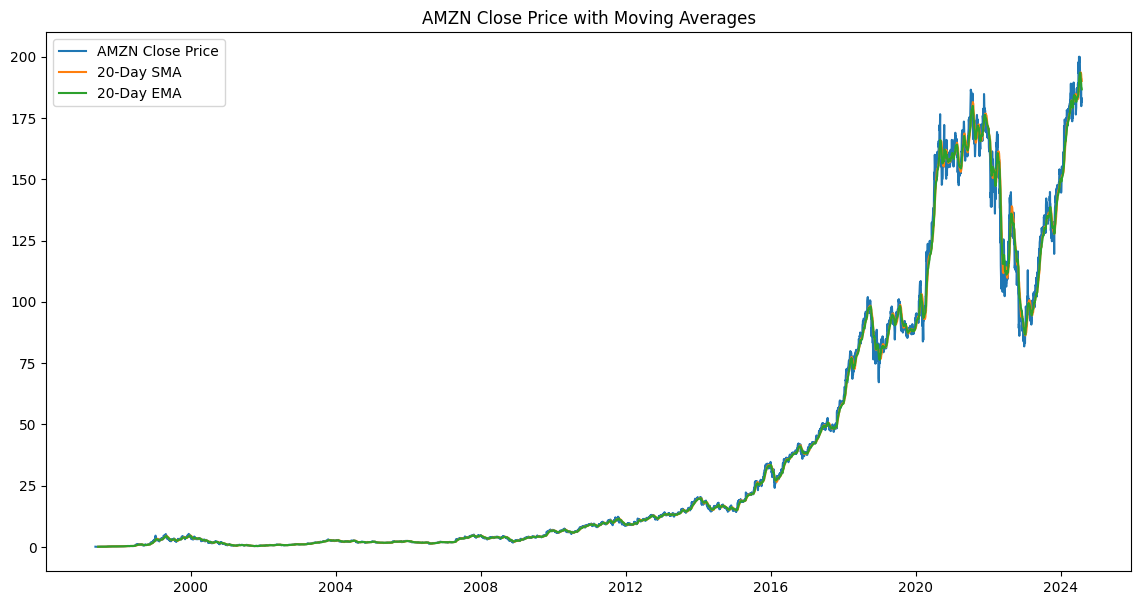

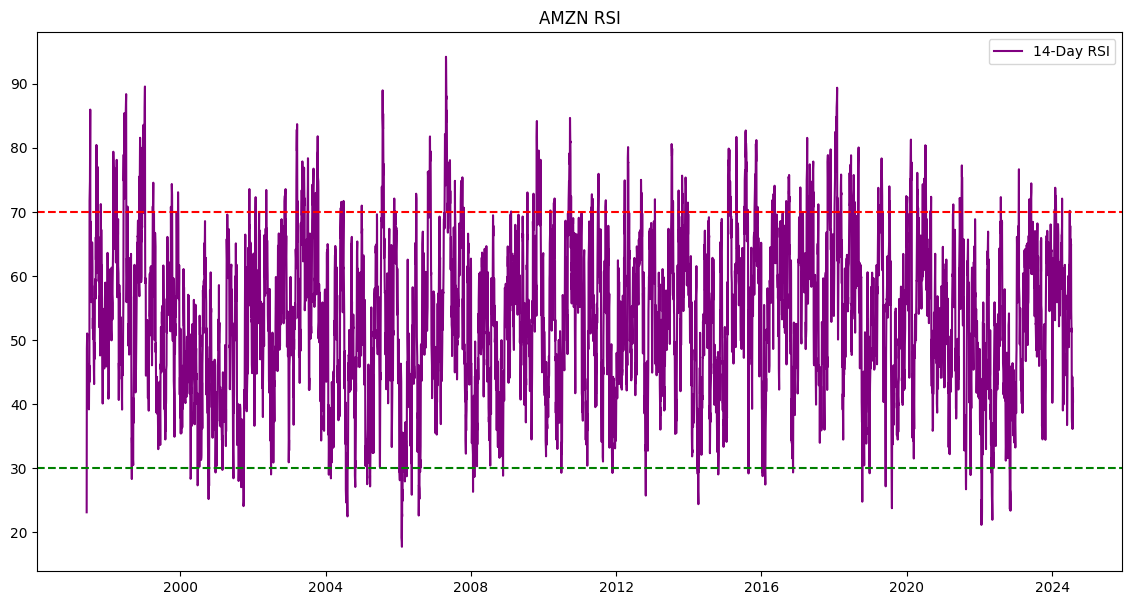

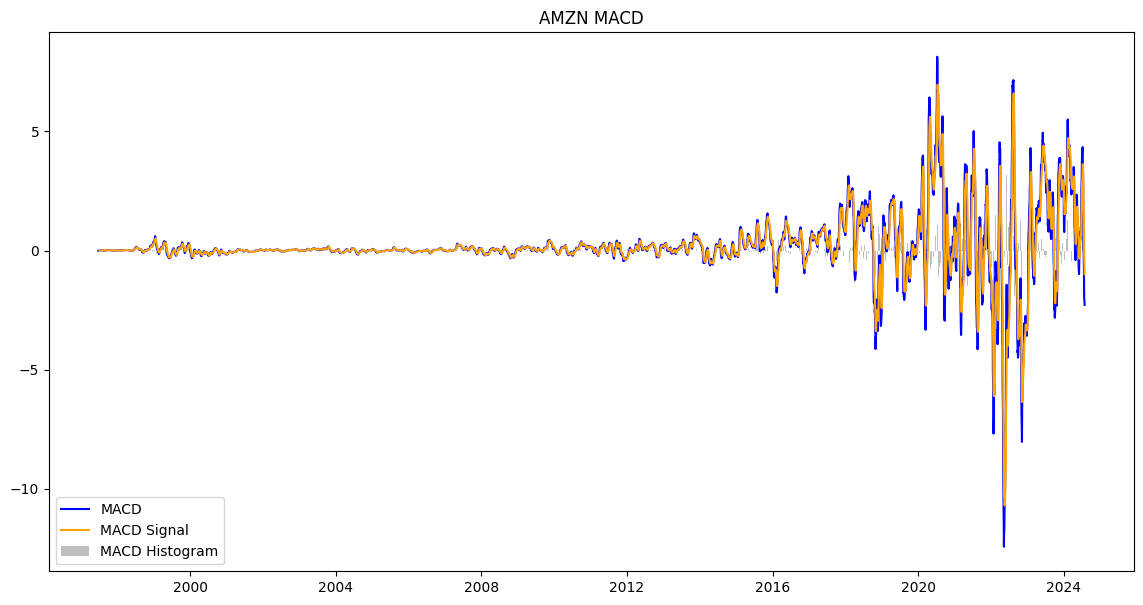

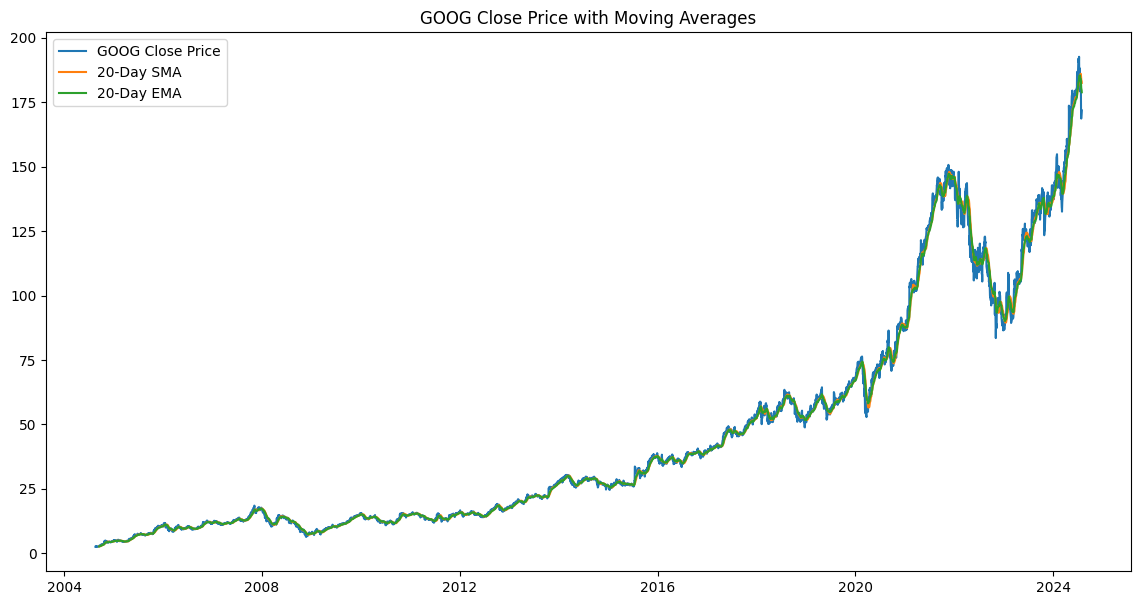

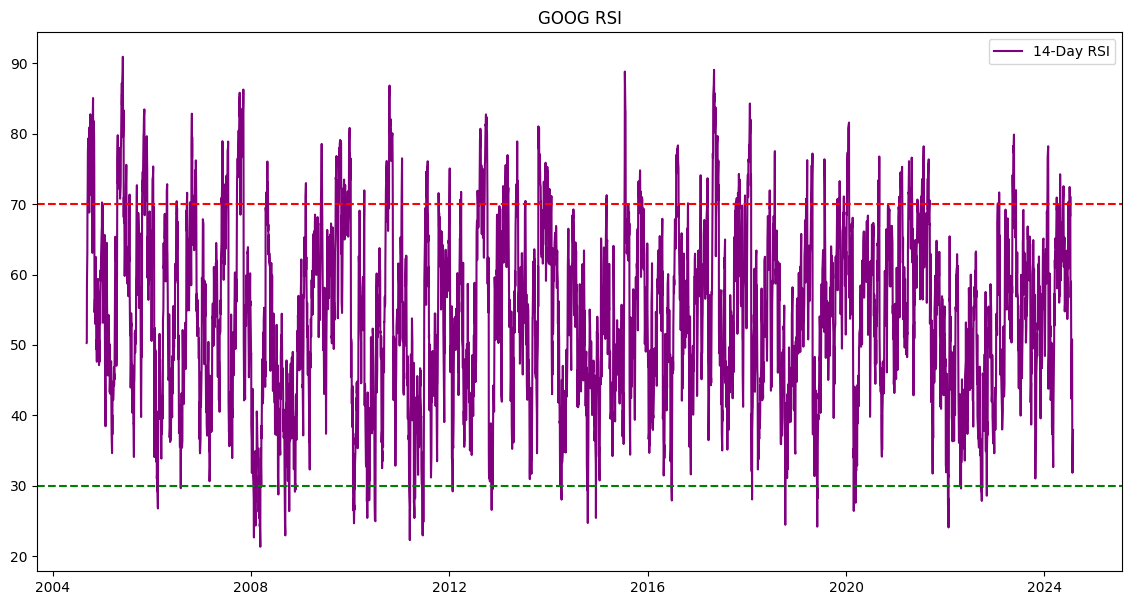

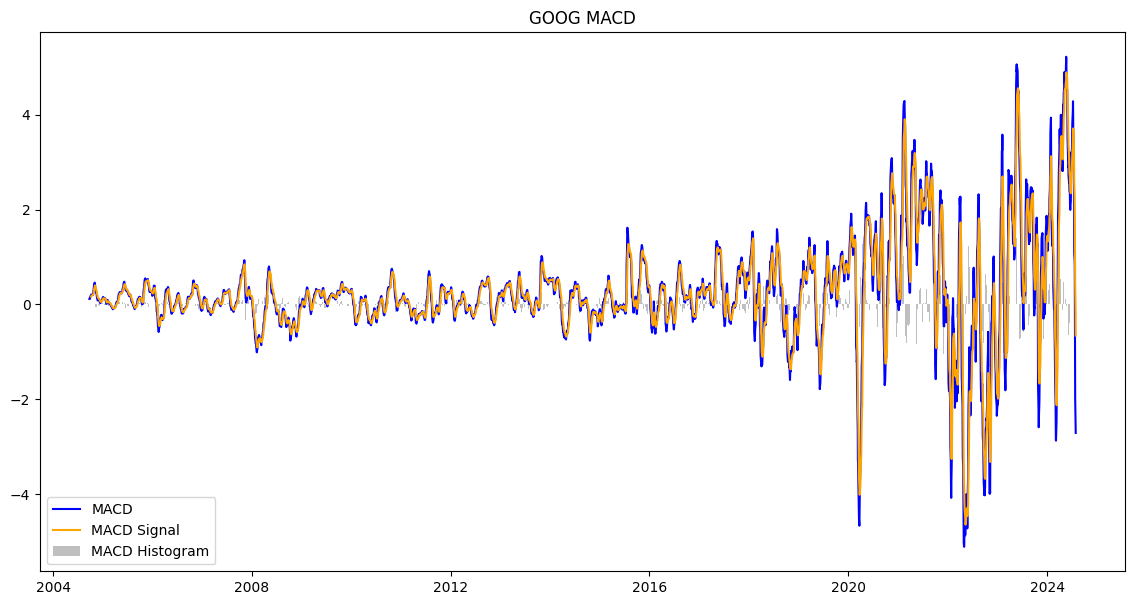

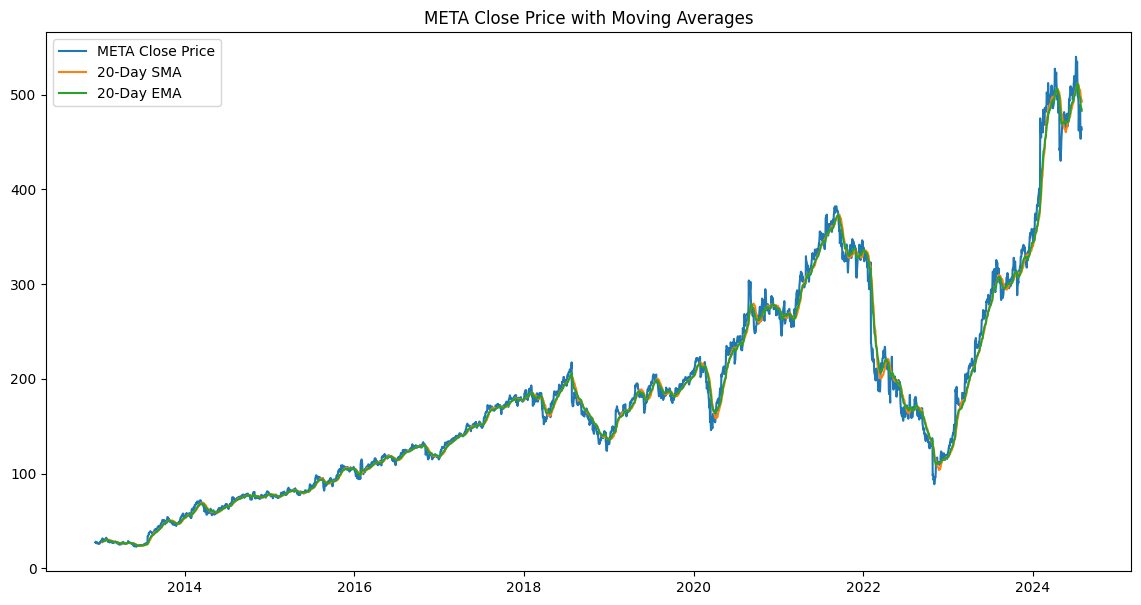

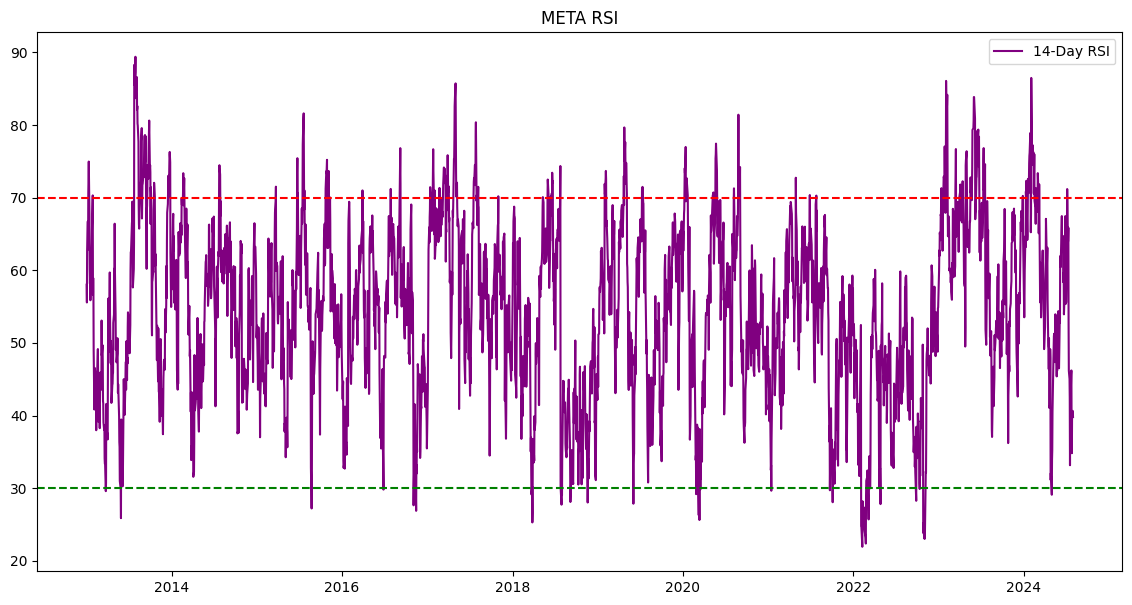

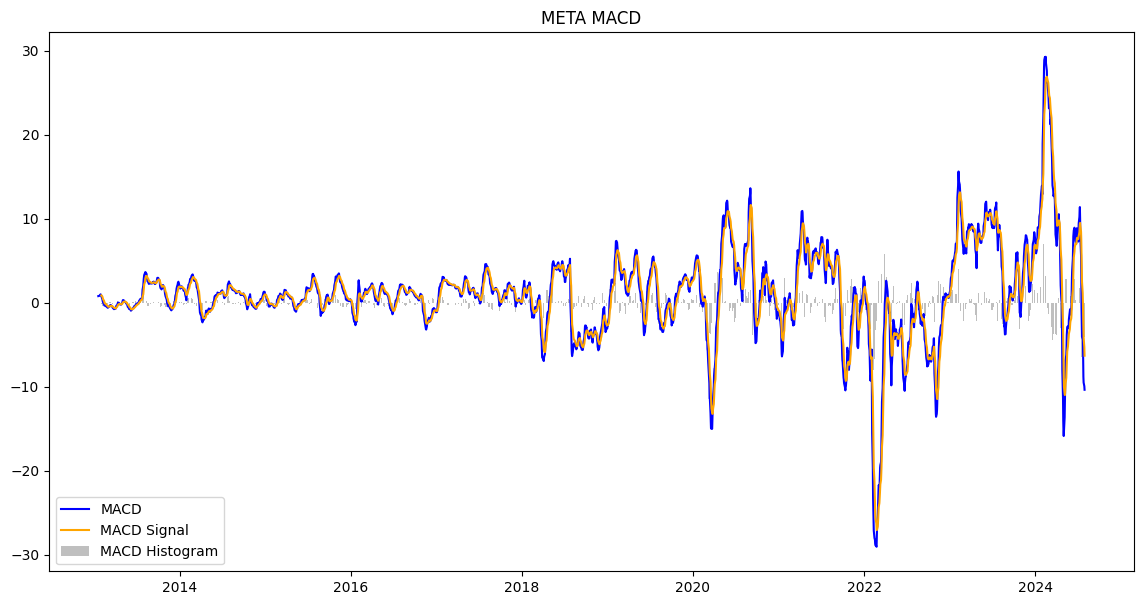

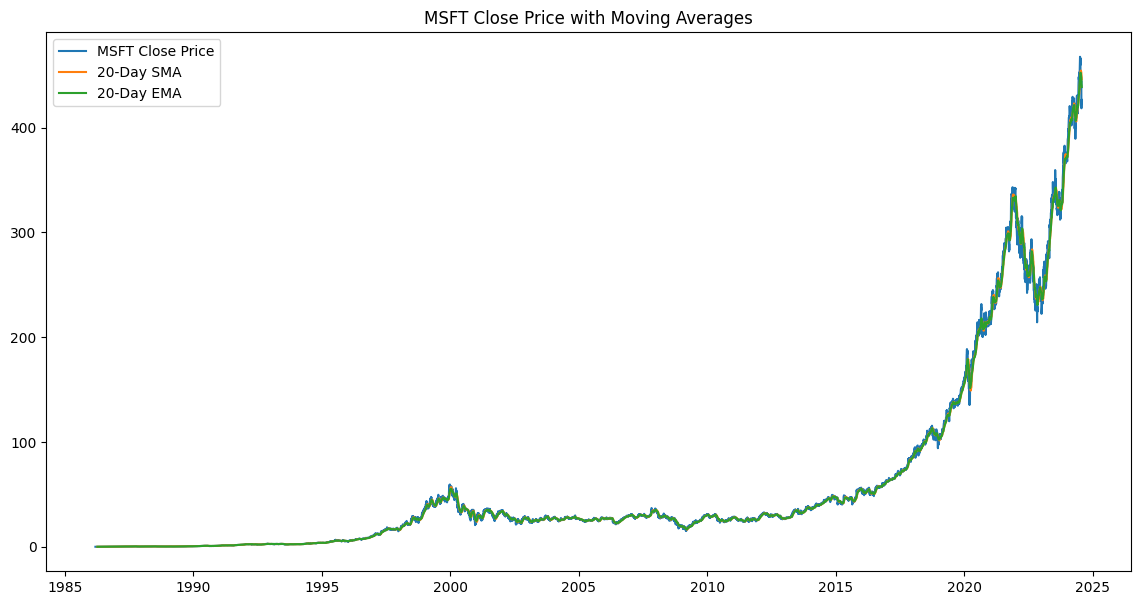

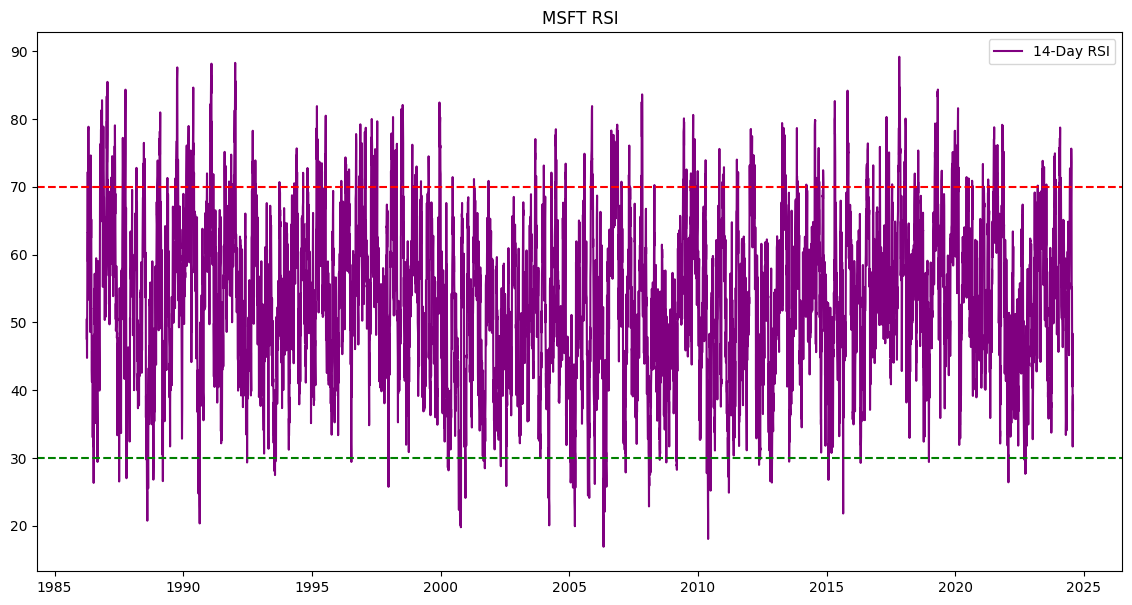

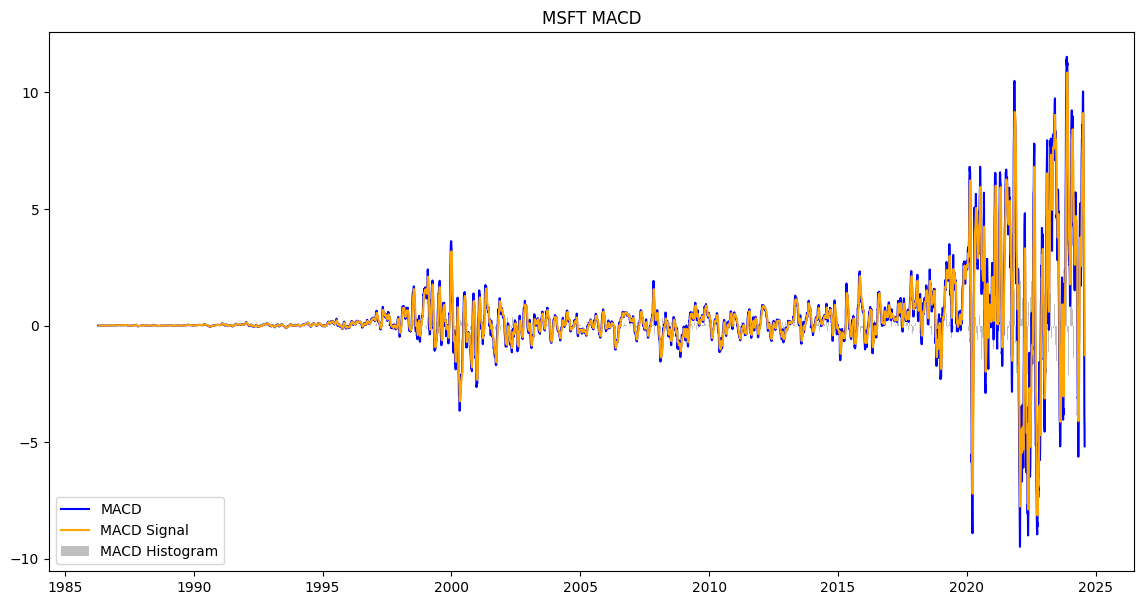

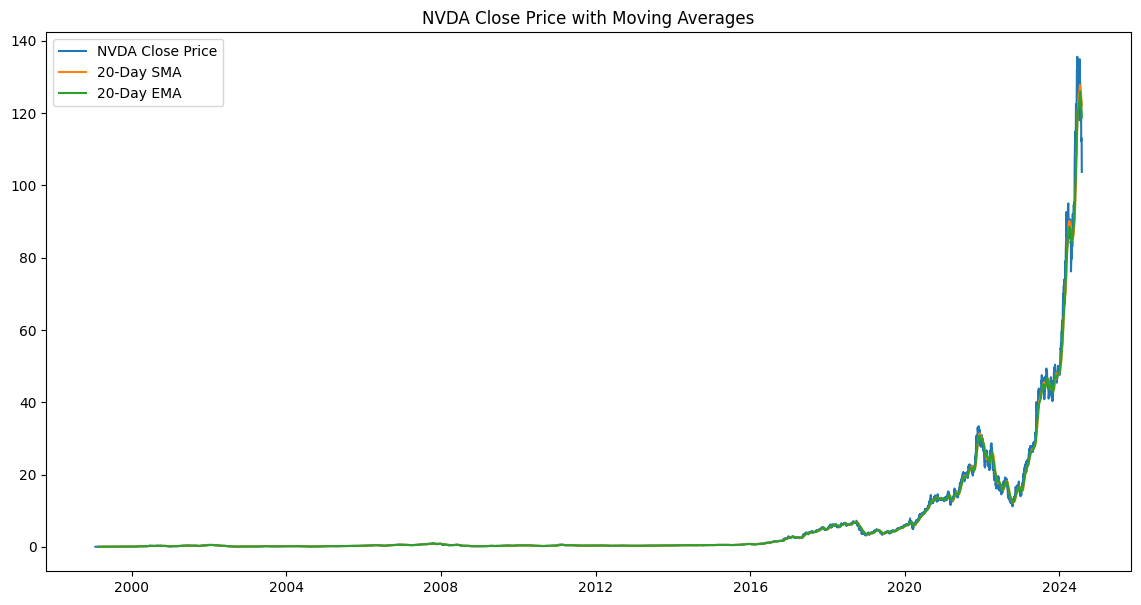

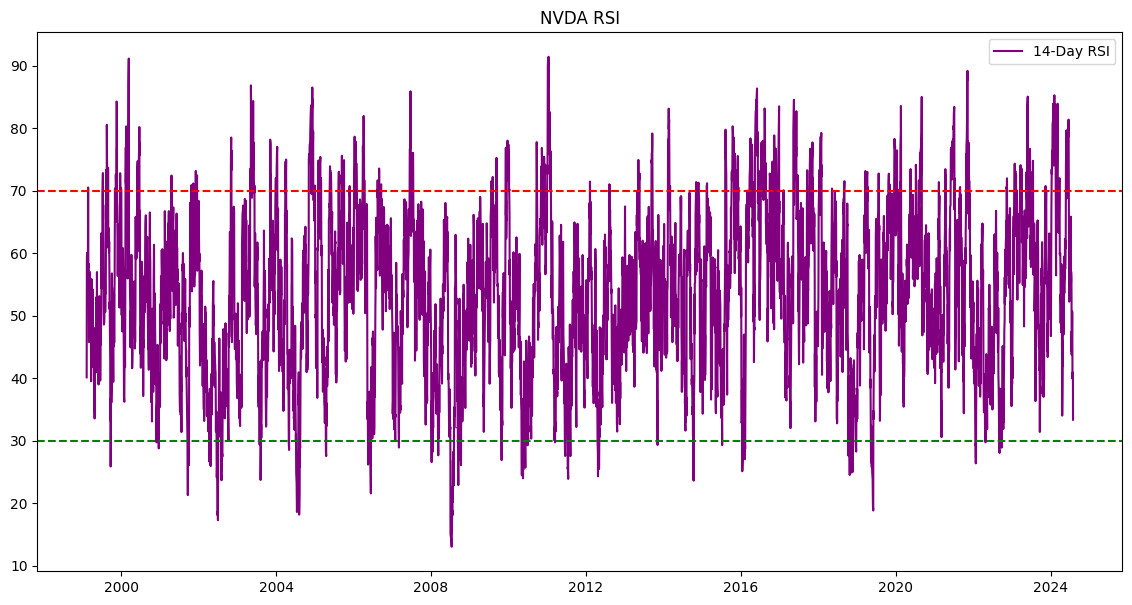

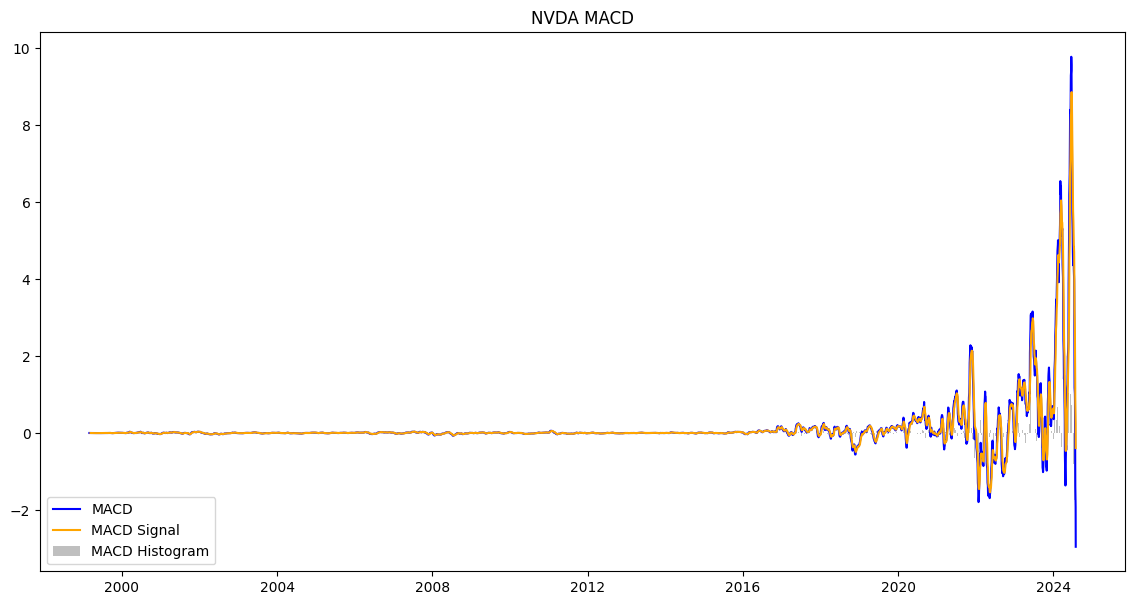

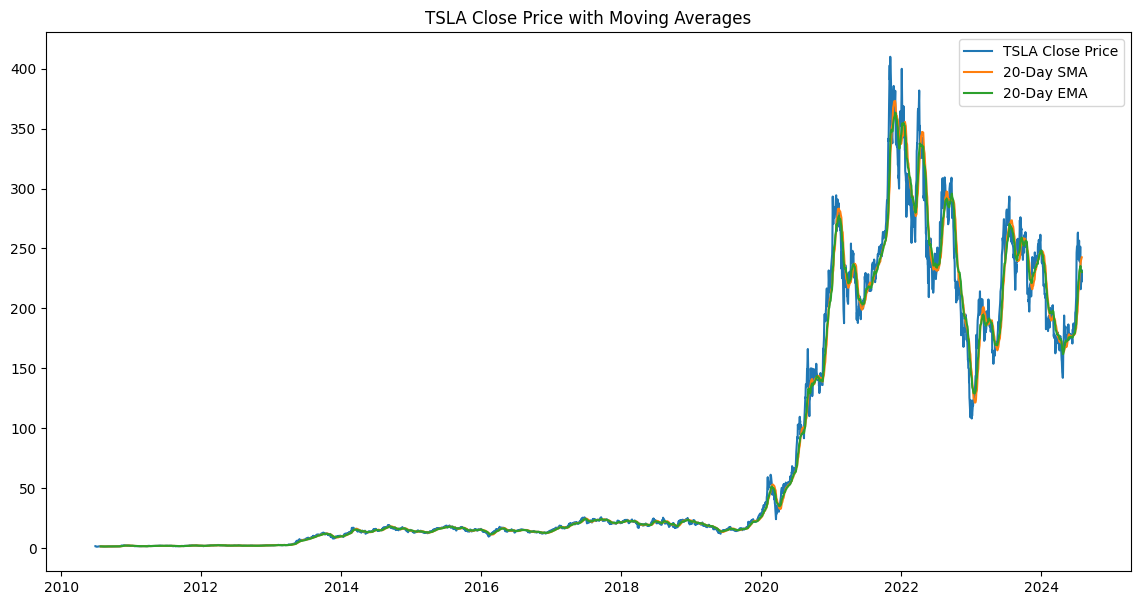

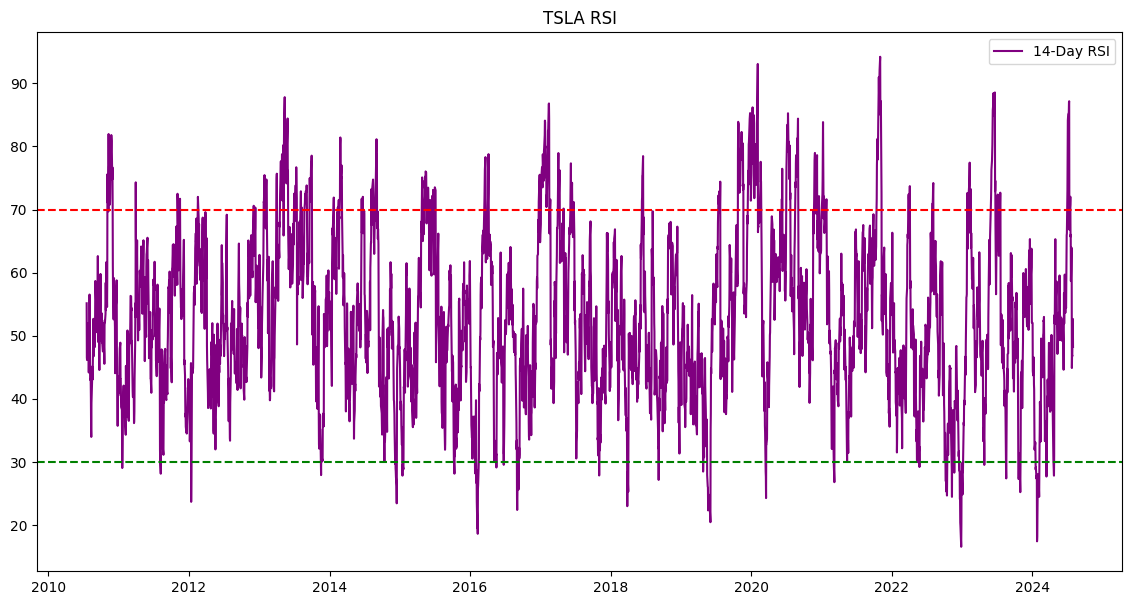

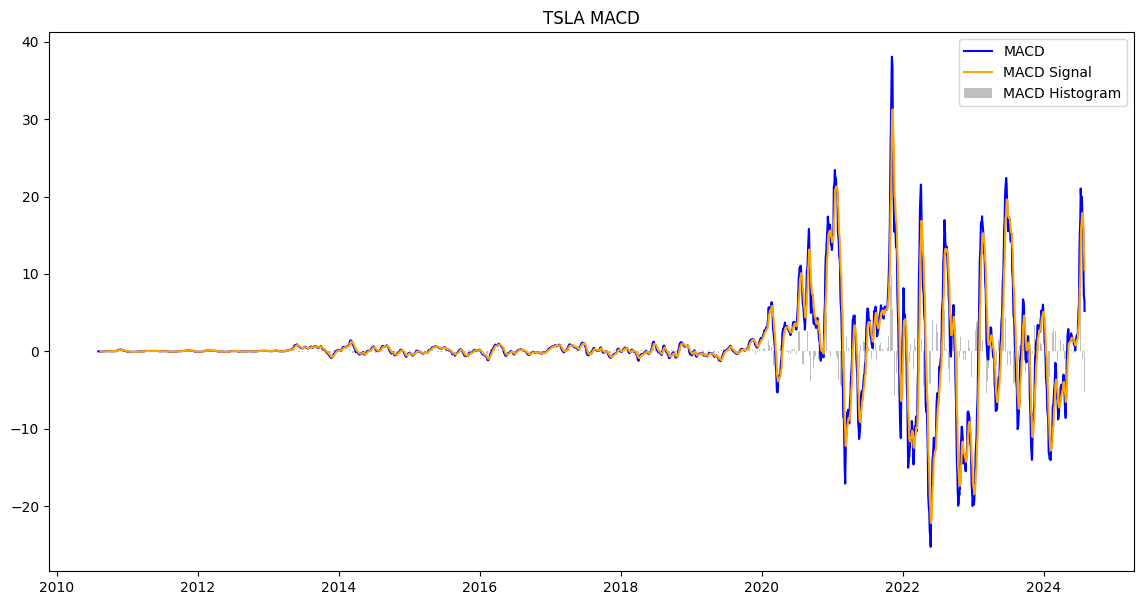

In [8]:
import matplotlib.pyplot as plt

for stock_symbol, df in stock_data.items():
    # Plot Close price and Moving Averages
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label=f'{stock_symbol} Close Price')
    plt.plot(df.index, df['SMA_20'], label='20-Day SMA')
    plt.plot(df.index, df['EMA_20'], label='20-Day EMA')
    plt.title(f'{stock_symbol} Close Price with Moving Averages')
    plt.legend()
    plt.show()

    # Plot RSI
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['RSI_14'], label='14-Day RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title(f'{stock_symbol} RSI')
    plt.legend()
    plt.show()

    # Plot MACD
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['MACD_signal'], label='MACD Signal', color='orange')
    plt.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
    plt.title(f'{stock_symbol} MACD')
    plt.legend()
    plt.show()


In [9]:
# Drop rows with NaN values in any of the indicator columns
stock_data = stock_data.dropna()

# Display the first few rows to check the calculated indicators
print(stock_data[['Date', 'Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'MACD_Signal']])

            Date       Close      SMA_20      EMA_20        RSI      MACD  \
98    1981-05-05    0.125558    0.123521    0.123217  56.458672  0.003168   
99    1981-05-06    0.122210    0.123884    0.123121  50.790373  0.002706   
100   1981-05-07    0.123884    0.124051    0.123194  53.314206  0.002447   
101   1981-05-08    0.125000    0.124163    0.123366  54.972209  0.002305   
102   1981-05-11    0.122210    0.124051    0.123256  50.174763  0.001945   
...          ...         ...         ...         ...        ...       ...   
10993 2024-07-24  218.539993  224.228500  222.376929  48.687742  4.662717   
10994 2024-07-25  217.490005  224.440500  221.911508  47.386437  3.748082   
10995 2024-07-26  217.960007  224.633500  221.535174  48.055700  3.026267   
10996 2024-07-29  218.240005  225.014500  221.221349  48.476184  2.448591   
10997 2024-07-30  218.800003  225.117001  220.990744  49.359115  2.012764   

       MACD_Signal  
98        0.003376  
99        0.003242  
100       0.